In [31]:
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import pandas as pd
from IPython.display import display, HTML
import networkx as nx

In [2]:
df_qna = pd.read_csv("local_data/prepared.csv")
print(df_qna.shape)

(661, 6)


# Answers

In [3]:

with open('local_data/answer_embeddings.pkl', mode='rb') as pkl_file:
    X_answers = pickle.load(pkl_file)
print(X_answers.shape)
X_answers

(661, 1536)


array([[ 0.00146169,  0.01871423, -0.03199973, ...,  0.00021403,
         0.00383962,  0.00499351],
       [-0.01133289,  0.01012021,  0.02701622, ..., -0.01521566,
        -0.00603079,  0.01791293],
       [-0.02621103, -0.002022  ,  0.0171054 , ...,  0.00745273,
        -0.01175849,  0.01981121],
       ...,
       [ 0.01569564,  0.03622417, -0.04164425, ...,  0.00428242,
         0.00133314,  0.04451237],
       [-0.01553899,  0.00998357, -0.00298004, ...,  0.00093578,
         0.00306097,  0.02353971],
       [-0.00034272,  0.01770813, -0.0522969 , ..., -0.00382021,
        -0.00464494,  0.05260583]])

In [4]:
pca = PCA(n_components=2)
X_answers_2d = pca.fit_transform(X_answers)
X_answers_2d

array([[-0.22876373,  0.06157203],
       [ 0.28896283, -0.26929012],
       [ 0.04825842, -0.12798298],
       ...,
       [ 0.0342791 ,  0.25247757],
       [-0.24009134,  0.07256849],
       [-0.04198431,  0.20355276]])

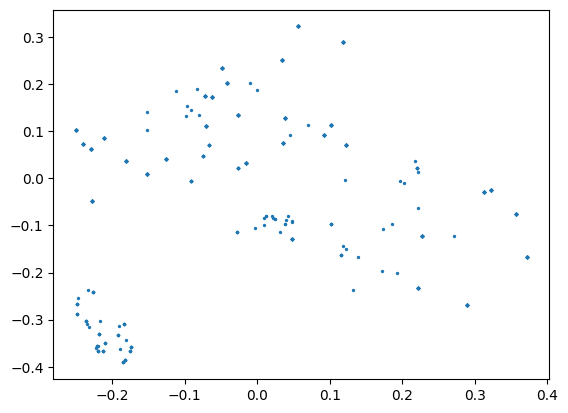

In [5]:
plt.scatter(X_answers_2d[:,0], X_answers_2d[:,1], s=2)

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:15<00:00,  6.60it/s]


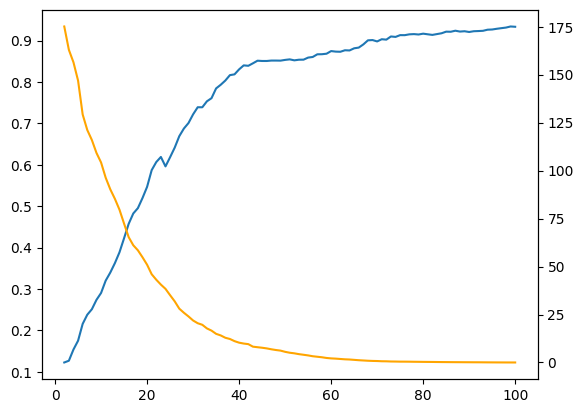

In [6]:
n_clusters_options = list(range(2,101))
silhouette_scores = []
inertia_scores = []
for n_clusters in tqdm(n_clusters_options):
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X_answers)
    inertia_scores.append(clusterer.inertia_)
    silhouette_avg = silhouette_score(X_answers, cluster_labels)
    silhouette_scores.append(silhouette_avg)

fig, ax1 = plt.subplots()
ax1.plot(n_clusters_options, silhouette_scores)
ax2 = ax1.twinx()
ax2.plot(n_clusters_options, inertia_scores, c='orange')


In [7]:
clusterer.inertia_

0.010518025799798866

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:06<00:00,  6.66it/s]


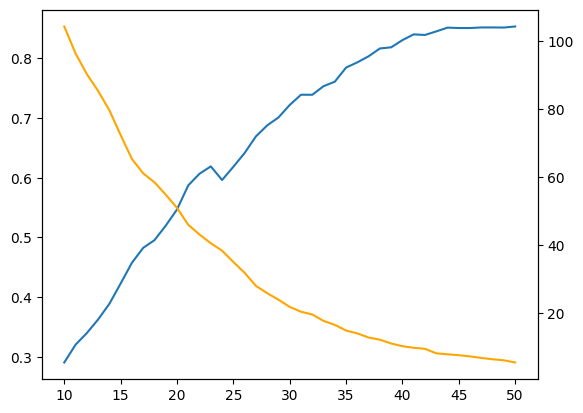

In [8]:
n_clusters_options = list(range(10,51))
silhouette_scores = []
inertia_scores = []
for n_clusters in tqdm(n_clusters_options):
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X_answers)
    inertia_scores.append(clusterer.inertia_)
    silhouette_avg = silhouette_score(X_answers, cluster_labels)
    silhouette_scores.append(silhouette_avg)

fig, ax1 = plt.subplots()
ax1.plot(n_clusters_options, silhouette_scores)
ax2 = ax1.twinx()
ax2.plot(n_clusters_options, inertia_scores, c='orange')


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:04<00:00,  6.14it/s]


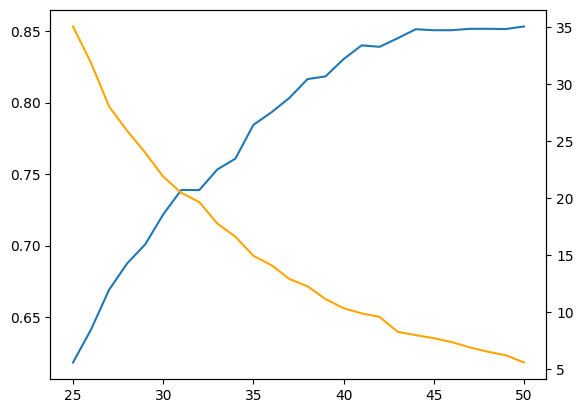

In [9]:
n_clusters_options = list(range(25,51))
silhouette_scores = []
inertia_scores = []
for n_clusters in tqdm(n_clusters_options):
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels_answers = clusterer.fit_predict(X_answers)
    inertia_scores.append(clusterer.inertia_)
    silhouette_avg = silhouette_score(X_answers, cluster_labels_answers)
    silhouette_scores.append(silhouette_avg)

fig, ax1 = plt.subplots()
ax1.plot(n_clusters_options, silhouette_scores)
ax2 = ax1.twinx()
ax2.plot(n_clusters_options, inertia_scores, c='orange')


0 16
1 32
2 16
3 16
4 16
5 16
6 18
7 16
8 28
9 16
10 32
11 16
12 16
13 32
14 16
15 16
16 17
17 16
18 16
19 16
20 17
21 16
22 46
23 16
24 16
25 15
26 16
27 16
28 7
29 16
30 16
31 14
32 9
33 4
34 14
35 18
36 6
37 16


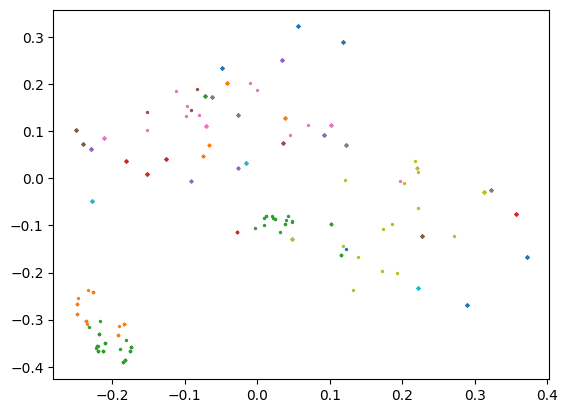

In [10]:
n_clusters = 38
clusterer = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels_answers = clusterer.fit_predict(X_answers)
for cluster in range(n_clusters):
    X_cluster_2d = X_answers_2d[cluster_labels_answers == cluster,:]
    print(cluster, X_cluster_2d.shape[0])
    plt.scatter(X_cluster_2d[:,0], X_cluster_2d[:,1], s=2)

In [11]:
cluster = 33
respostas = df_qna.iloc[cluster_labels == cluster].resposta.values
for idx in range(len(respostas)):
    resposta =  respostas[idx]
    display(HTML(f"<H1>RESPOSTA {idx+1}/{len(respostas)}</H1>"))
    display(HTML(resposta))

# Questions

In [12]:
with open('local_data/question_embeddings.pkl', mode='rb') as pkl_file:
    X_questions = pickle.load(pkl_file)
print(X_questions.shape)
X_questions

(661, 1536)


array([[ 0.02774474,  0.00365294, -0.02350792, ...,  0.00263921,
        -0.00758168,  0.00979986],
       [ 0.00078652,  0.00399377, -0.00828338, ..., -0.00700901,
        -0.02218762,  0.00384301],
       [ 0.0098039 , -0.00761893,  0.02033613, ...,  0.02031337,
        -0.00892764,  0.00621919],
       ...,
       [ 0.07793394, -0.00479394, -0.03930265, ...,  0.03538637,
         0.0031575 ,  0.04579248],
       [-0.00318145, -0.00140842, -0.00160963, ...,  0.01419498,
         0.00307342,  0.03366175],
       [ 0.00579197, -0.00796867, -0.04693921, ..., -0.00610447,
        -0.01190722,  0.01705803]])

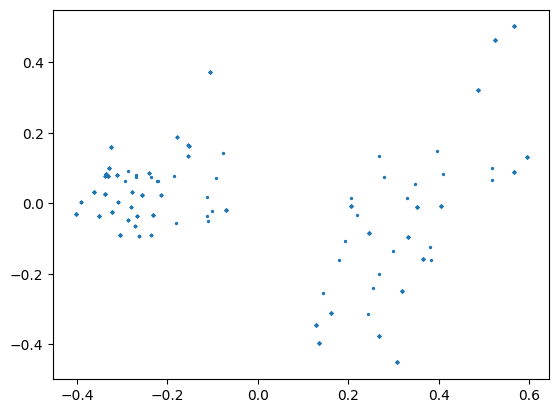

In [13]:
pca = PCA(n_components=2)
X_questions_2d = pca.fit_transform(X_questions)
plt.scatter(X_questions_2d[:,0], X_questions_2d[:,1], s=2)

 91%|██████████████████████████████████████████████████████████████████████████▌       | 90/99 [00:16<00:02,  3.68it/s]C:\Users\guspabon\source\repos\sandbox\qna-eda\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (91) found smaller than n_clusters (92). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
 92%|███████████████████████████████████████████████████████████████████████████▎      | 91/99 [00:17<00:02,  3.05it/s]C:\Users\guspabon\source\repos\sandbox\qna-eda\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (91) found smaller than n_clusters (93). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
 93%|████████████████████████████████████████████████████████████████████████████▏     | 92/99 [00:17<00:03,  2.26it/s]C:\Users\guspabon\source\repos\sandbox\qna-eda\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceW

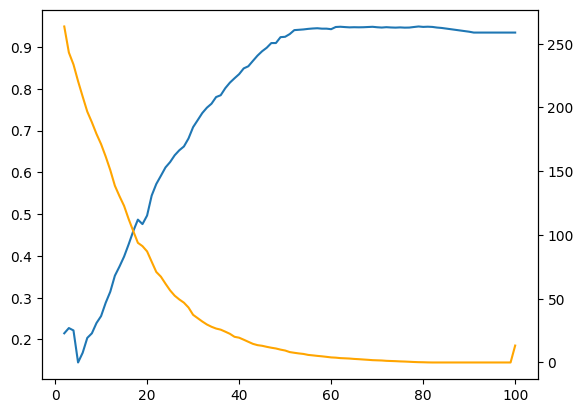

In [14]:
n_clusters_options = list(range(2,101))
silhouette_scores = []
inertia_scores = []
for n_clusters in tqdm(n_clusters_options):
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X_questions)
    inertia_scores.append(clusterer.inertia_)
    silhouette_avg = silhouette_score(X_questions, cluster_labels)
    silhouette_scores.append(silhouette_avg)

fig, ax1 = plt.subplots()
ax1.plot(n_clusters_options, silhouette_scores)
ax2 = ax1.twinx()
ax2.plot(n_clusters_options, inertia_scores, c='orange')

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:06<00:00,  5.96it/s]


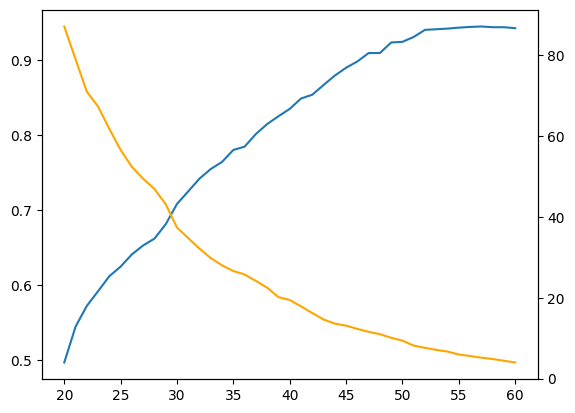

In [15]:
n_clusters_options = list(range(20,61))
silhouette_scores = []
inertia_scores = []
for n_clusters in tqdm(n_clusters_options):
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X_questions)
    inertia_scores.append(clusterer.inertia_)
    silhouette_avg = silhouette_score(X_questions, cluster_labels)
    silhouette_scores.append(silhouette_avg)

fig, ax1 = plt.subplots()
ax1.plot(n_clusters_options, silhouette_scores)
ax2 = ax1.twinx()
ax2.plot(n_clusters_options, inertia_scores, c='orange')

0 16
1 16
2 16
3 18
4 16
5 9
6 28
7 16
8 16
9 16
10 16
11 16
12 16
13 18
14 7
15 18
16 18
17 17
18 15
19 16
20 16
21 16
22 16
23 15
24 16
25 16
26 16
27 9
28 16
29 15
30 16
31 16
32 9
33 9
34 16
35 7
36 16
37 16
38 6
39 7
40 9
41 4
42 9
43 9
44 7
45 12
46 9
47 1
48 7
49 1


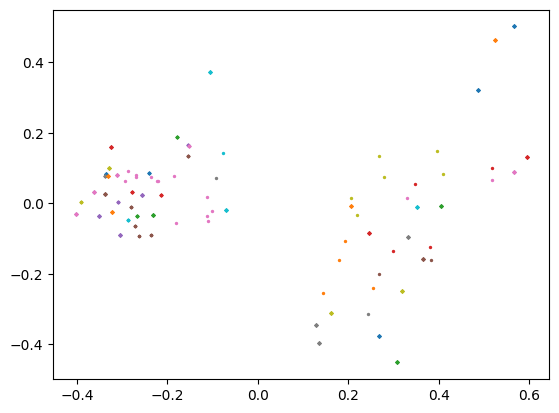

In [16]:
n_clusters = 50
clusterer = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels_questions = clusterer.fit_predict(X_questions)
for cluster in range(n_clusters):
    X_cluster_2d = X_questions_2d[cluster_labels_questions == cluster,:]
    print(cluster, X_cluster_2d.shape[0])
    plt.scatter(X_cluster_2d[:,0], X_cluster_2d[:,1], s=2)

In [17]:
cluster = 12
perguntas = df_qna.iloc[cluster_labels_questions == cluster].pergunta.values
for idx in range(len(perguntas)):
    pergunta =  perguntas[idx]
    display(HTML(f"<H1>PERGUNTA {idx+1}/{len(perguntas)}</H1>"))
    display(HTML(pergunta))

In [20]:
df_qna['cluster_answer'] = cluster_labels_answers
df_qna['cluster_question'] = cluster_labels_questions

In [68]:
df_cluster_rel = df_qna[['cluster_question','cluster_answer']].drop_duplicates().reset_index(drop=True).copy()
df_cluster_rel

,cluster_question,cluster_answer
0,31,4
1,19,20
2,6,8
3,37,37
4,9,7
...,...,...
61,14,34
62,6,16
63,44,34
64,39,31


In [66]:
df_cluster_q_counts = df_cluster_rel.value_counts('cluster_question')
q_insight = df_cluster_q_counts[df_cluster_q_counts>1].index.values
pd.DataFrame(df_cluster_q_counts[df_cluster_q_counts>1])

,count
cluster_question,
16,3
3,3
15,3
6,3
13,3
41,3
17,2
45,2
33,2


In [67]:
df_cluster_a_counts = df_cluster_rel.value_counts('cluster_answer')
a_insight = df_cluster_a_counts[df_cluster_a_counts>1].index.values
pd.DataFrame(df_cluster_a_counts[df_cluster_a_counts>1])

,count
cluster_answer,
22,8
1,7
36,6
8,3
16,2
35,2
34,2
6,2
20,2


In [82]:
df_cluster_rel_insight = df_cluster_rel[
    (df_cluster_rel['cluster_question'].isin(q_insight))|
    (df_cluster_rel['cluster_answer'].isin(a_insight))
]
df_cluster_rel_no_insight = df_cluster_rel[
    (~df_cluster_rel['cluster_question'].isin(q_insight))&
    (~df_cluster_rel['cluster_answer'].isin(a_insight))
]


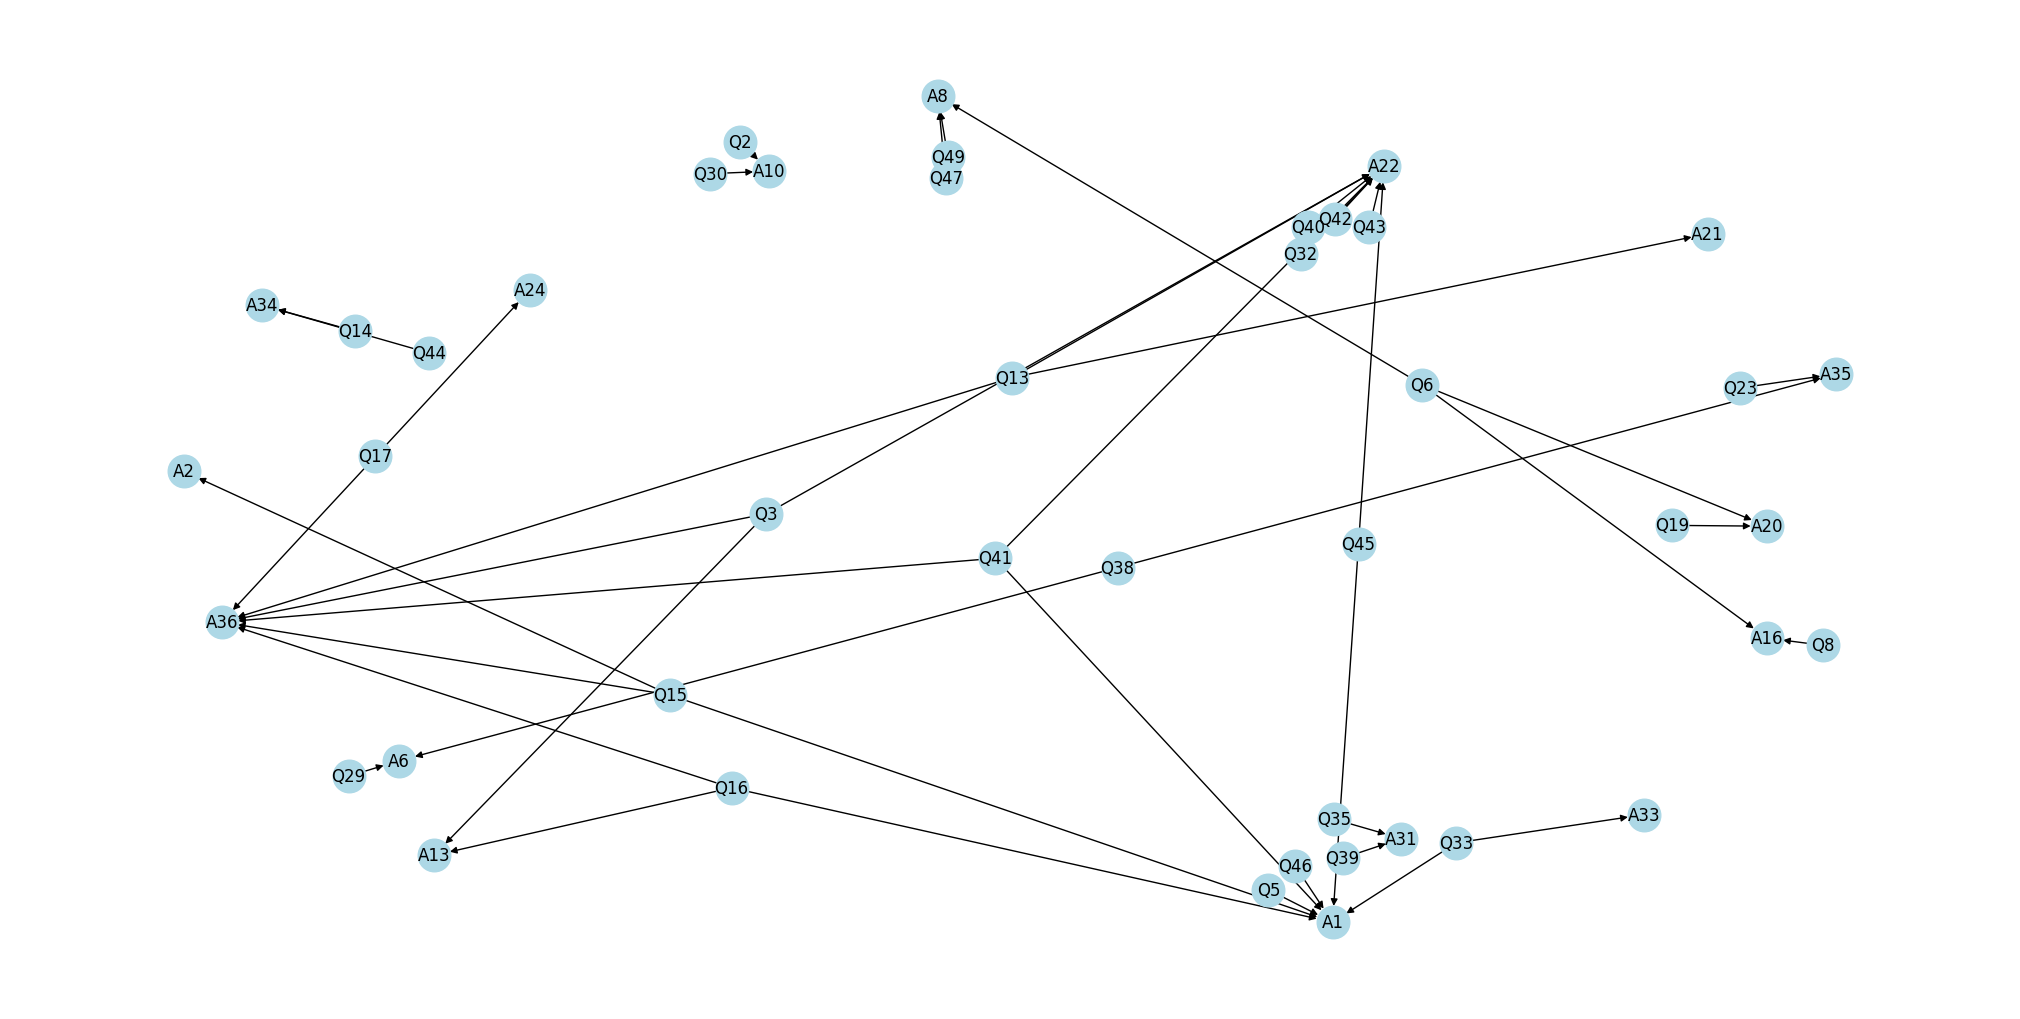

In [119]:
G = nx.DiGraph()
G.add_edges_from(list(zip('Q'+df_cluster_rel_insight['cluster_question'].astype(str),'A'+df_cluster_rel_insight['cluster_answer'].astype(str))))
#pos = nx.spring_layout(G)
pos = nx.fruchterman_reingold_layout(G, seed=0)
plt.figure(figsize=(20, 10))
nx.draw(G, pos, with_labels=True, node_size=550, node_color='lightblue', font_size=12, font_color='black', arrows=True)


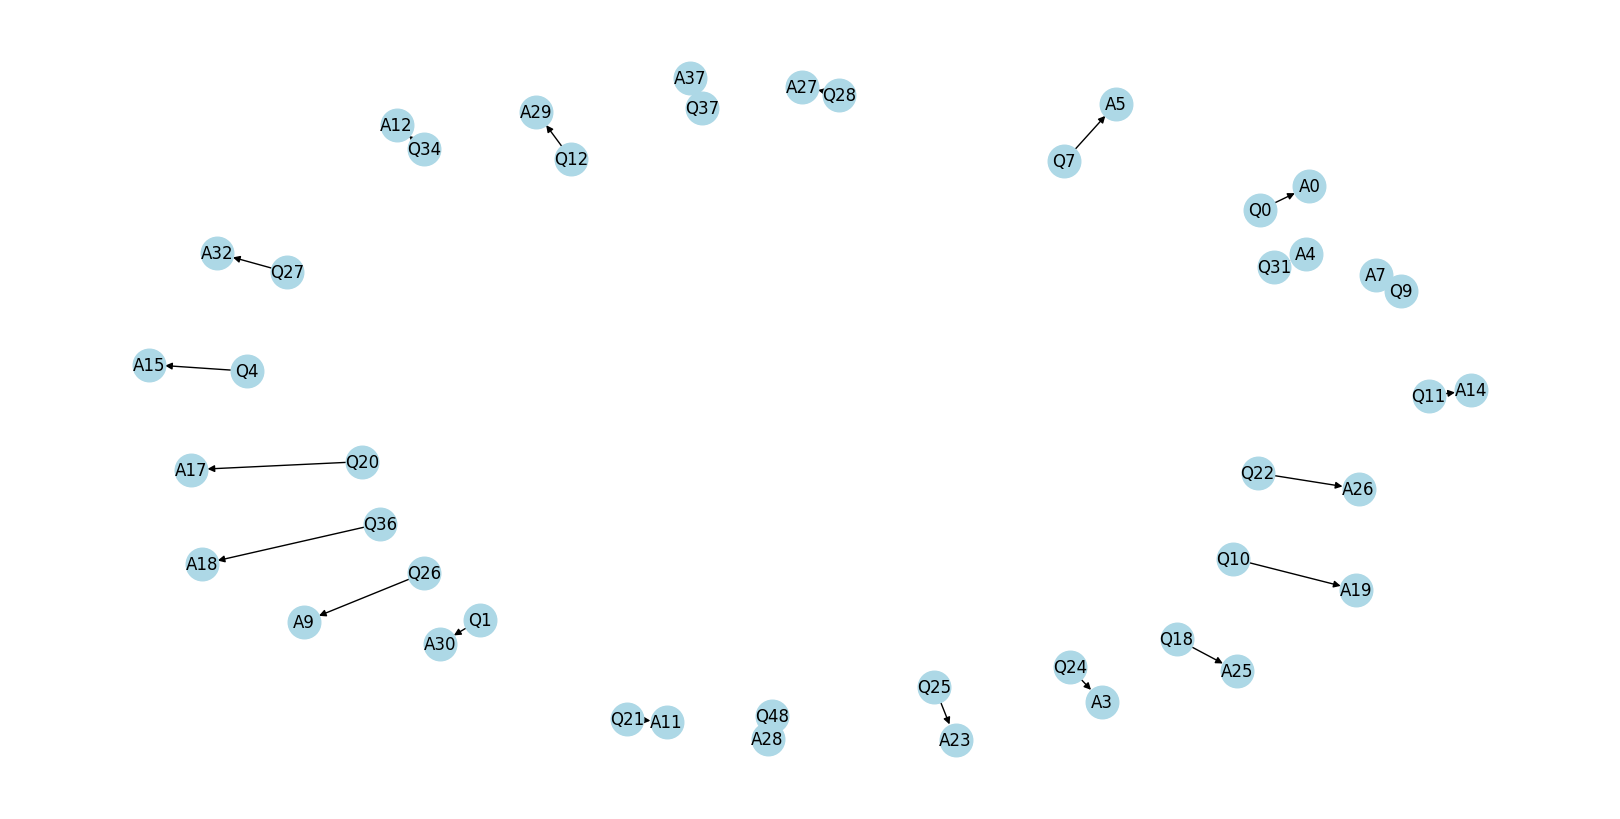

In [123]:
G = nx.DiGraph()
G.add_edges_from(
    list(
        zip(
            'Q'+df_cluster_rel_no_insight['cluster_question'].astype(str),
            'A'+df_cluster_rel_no_insight['cluster_answer'].astype(str)
        )
    )
)
#pos = nx.spring_layout(G)
pos = nx.fruchterman_reingold_layout(G, seed=0)
plt.figure(figsize=(16, 8))
nx.draw(G, pos, with_labels=True, node_size=550, node_color='lightblue', font_size=12, font_color='black', arrows=True)
